In [1]:
%load_ext autoreload
%autoreload 2

# Setup Environment
import sys
import os
ROOT = '../../'
sys.path.append(ROOT)

import gym
from gym.spaces import Discrete
import numpy as np
from gym.wrappers.monitoring.video_recorder import VideoRecorder
from IPython.display import HTML
from source.agents.policy_gradient_agent import PolicyGradientAgent
from source.utils import utils
from tqdm import tqdm
import torch
import random

/Users/tonywy/micromamba/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


using device: cpu
policy_gradient_agent_test passed!


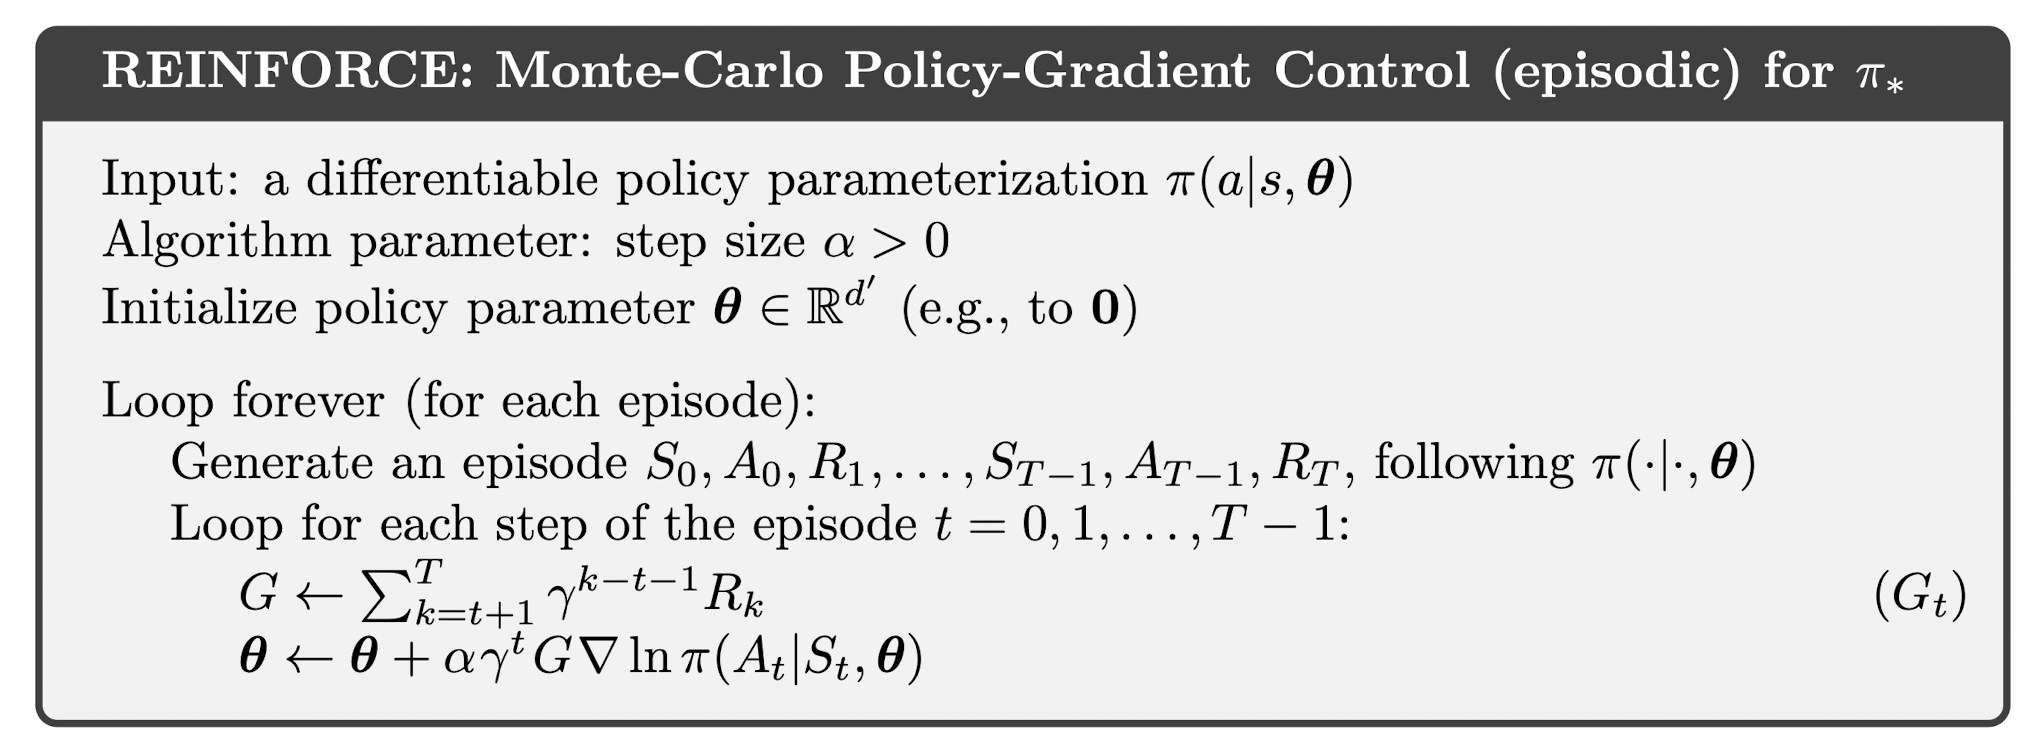

In [2]:
# Policy Eval
# Params
num_epoch = 50
num_episode = 100
video_path = os.path.join(ROOT, "video/reinforce.mp4")
random_seed = 101

# Initialize
history = []
total_reward = 0
# set random seeds
rng = np.random.default_rng(random_seed)
#random.seed(random_seed)
np.random.seed(random_seed)
#torch.manual_seed(random_seed)

# Create Environment.
#env = gym.make('Taxi-v3')
# using render_mode=rgb_array so that video recording works
#env = gym.make(
#    "LunarLander-v2",
#    render_mode='rgb_array'
#)
env = gym.make("CartPole-v1", render_mode='rgb_array')
#env = gym.make("CarRacing-v2", render_mode='rgb_array', continuous=False)
env.np_random = rng

# Create Agent
agent = PolicyGradientAgent(
    state_space=env.observation_space,
    action_space=env.action_space,
    discount_rate=0.99,
    epsilon=None, # use epsilon_schedule
    learning_rate=1e-3,
    net_params={'width':32, 'n_hidden':1}
)
# Start Learning
for i in range(num_epoch):
    success = 0
    for _ in tqdm(range(num_episode)):
        reward, steps = agent.play_episode(env)
        if reward > 0:
            success += 1
        history.append(reward)
        total_reward += reward
    print(
        f"step: {i}, average_return: {np.mean(history)}, success rate: {success / num_episode}")
print(f"\nrewarding episodes: {total_reward}")

# For off policy learning only: get greedy policy (no exploration)
#agent._policy = get_epsilon_greedy_policy_from_action_values(agent._Q.weight)
# Run Eval
avarge_return, success_rate = utils.evaluate_agent(agent, env, num_episode=100, threshold=500)
print(f"Average return = {avarge_return}, Success rate = {success_rate}")

# play last episode with video recording

utils.plot_history(history)


using device: cpu


100%|██████████| 100/100 [00:00<00:00, 169.05it/s]


step: 0, average_return: 20.1, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 145.81it/s]


step: 1, average_return: 22.325, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 155.86it/s]


step: 2, average_return: 22.69333333333333, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 154.19it/s]


step: 3, average_return: 23.335, success rate: 1.0


100%|██████████| 100/100 [00:00<00:00, 128.63it/s]


step: 4, average_return: 24.806, success rate: 1.0


100%|██████████| 100/100 [00:01<00:00, 97.13it/s]


step: 5, average_return: 27.39666666666667, success rate: 1.0


100%|██████████| 100/100 [00:01<00:00, 63.86it/s]


step: 6, average_return: 32.247142857142855, success rate: 1.0


100%|██████████| 100/100 [00:02<00:00, 35.12it/s]


step: 7, average_return: 41.975, success rate: 1.0


100%|██████████| 100/100 [00:05<00:00, 19.95it/s]


step: 8, average_return: 58.843333333333334, success rate: 1.0


100%|██████████| 100/100 [00:07<00:00, 13.97it/s]


step: 9, average_return: 80.567, success rate: 1.0


100%|██████████| 100/100 [00:09<00:00, 10.96it/s]


step: 10, average_return: 105.15545454545455, success rate: 1.0


100%|██████████| 100/100 [00:11<00:00,  8.98it/s]


step: 11, average_return: 131.41333333333333, success rate: 1.0


100%|██████████| 100/100 [00:11<00:00,  8.80it/s]


step: 12, average_return: 154.57461538461538, success rate: 1.0


100%|██████████| 100/100 [00:11<00:00,  8.54it/s]


step: 13, average_return: 175.49, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  8.11it/s]


step: 14, average_return: 195.13733333333334, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


step: 15, average_return: 213.69875, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  7.94it/s]


step: 16, average_return: 229.30588235294118, success rate: 1.0


100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


step: 17, average_return: 243.69333333333333, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  7.81it/s]


step: 18, average_return: 256.74052631578945, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  8.12it/s]


step: 19, average_return: 268.129, success rate: 1.0


100%|██████████| 100/100 [00:12<00:00,  7.72it/s]


step: 20, average_return: 279.0419047619048, success rate: 1.0


100%|██████████| 100/100 [00:13<00:00,  7.57it/s]


step: 21, average_return: 288.80045454545456, success rate: 1.0


100%|██████████| 100/100 [00:13<00:00,  7.57it/s]


step: 22, average_return: 297.6913043478261, success rate: 1.0


100%|██████████| 100/100 [00:13<00:00,  7.60it/s]


step: 23, average_return: 305.8375, success rate: 1.0


 88%|████████▊ | 88/100 [00:11<00:01,  7.61it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/tonywy/micromamba/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/mg/2p2_pc4n3fzgdjdz9h88kd1c0000gn/T/ipykernel_9908/2559471764.py", line 41, in <module>
    reward, steps = agent.play_episode(env)
  File "/Users/tonywy/Desktop/mini-rl/source/agents/policy_gradient_agent.py", line 94, in play_episode
  File "/Users/tonywy/Desktop/mini-rl/source/agents/policy_gradient_agent.py", line 54, in sample_action
    assert list(state_tensor.shape) == [
  File "/Users/tonywy/micromamba/lib/python3.9/site-packages/torch/distributions/categorical.py", line 57, in __init__
    self.probs = probs / probs.sum(-1, keepdim=True)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/tonywy/micromamba/lib/python3.9/site-packages/IPython/core/interactiveshell.py"

In [ ]:

reward, _ = agent.play_episode(env, video_path=video_path, epsilon=0)
print(reward)
html=utils.render_mp4(video_path)
HTML(html)


Moviepy - Building video ../../video/reinforce.mp4.
Moviepy - Writing video ../../video/reinforce.mp4



Moviepy - Done !
Moviepy - video ready ../../video/reinforce.mp4
123.36783843508317
